In [291]:
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
import pandas as pd
import os
from astLib import astSED
import astropy.io.fits as fits
from carf import * # custom module for functions relating to the project
import matplotlib.path as mpath
import seaborn as sns
from scipy.stats import gaussian_kde
import scipy as sp

# So that we can change the helper functions without reloading the kernel
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [292]:
# We need to ensure we are reading in our final dataframe we will be doing our analysis on. This dataframe should contain
zfourge_full = pd.read_csv('datasets/full_zfourge_decomposed/zfourge_full.csv')
zfourge_full

C:\Users\Titan\AppData\Local\Temp\ipykernel_4624\1097201852.py:2: DtypeWarning: Columns (156) have mixed types. Specify dtype option on import or set low_memory=False.
  zfourge_full = pd.read_csv('datasets/full_zfourge_decomposed/zfourge_full.csv')


,recno,ID,xpos,ypos,RAJ2000,DEJ2000,SE,isoArea,FKsap,e_FKsap,...,wminAll,UV_Full,VJ_Full,UV_Decomposed,VJ_Decomposed,zpk_y,UG_Full,GR_Full,UG_Decomposed,GR_Decomposed
0,5746,CDFS_5746,4778.412,2191.809,53.067131,-27.883856,2,362.0,2.69849,0.09566,...,NaN,0.689810,0.714080,0.689732,0.711157,2.9412,1.750977,0.474700,1.751233,0.474652
1,5928,CDFS_5928,4865.992,2198.946,53.063004,-27.883558,3,68.0,3.42457,0.10040,...,NaN,1.708819,1.109138,1.874559,1.133087,0.7154,0.422665,1.027818,0.369333,1.208906
2,5972,CDFS_5972,4686.141,2261.246,53.071480,-27.880964,2,300.0,8.39165,0.08648,...,NaN,0.999376,0.905876,0.987690,0.873039,0.9668,0.202035,0.266554,0.193878,0.247864
3,6179,CDFS_6179,4611.903,2274.999,53.074982,-27.880394,2,105.0,2.53720,0.08840,...,NaN,1.410744,1.106698,1.410744,1.106698,1.0748,0.255607,0.401815,0.255607,0.401815
4,6237,CDFS_6237,4887.093,2276.822,53.062008,-27.880312,0,76.0,2.11567,0.08941,...,NaN,0.633020,0.328743,0.633020,0.328743,0.7676,-0.062140,0.245327,-0.062140,0.245327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10871,22044,UDS_22044,3566.430,4893.681,34.280075,-5.112765,2,185.0,3.65836,0.07091,...,0.83,0.909005,0.757147,0.910699,0.733106,1.6291,0.292016,0.258233,0.281558,0.235555
10872,22049,UDS_22049,2294.715,4952.961,34.333279,-5.110303,0,19.0,0.40911,0.07459,...,0.75,0.452972,0.251804,0.414096,0.108096,1.2635,0.018853,-0.038792,0.007085,-0.068764
10873,22054,UDS_22054,3385.125,4948.140,34.287659,-5.110497,0,72.0,1.21011,0.07268,...,0.79,0.742504,0.438561,0.742504,0.438561,0.8957,-0.007408,0.149574,-0.007408,0.149574
10874,22059,UDS_22059,1658.167,4916.756,34.359909,-5.111814,0,102.0,1.84542,0.07892,...,0.67,0.913174,0.508098,0.913174,0.508098,0.3706,0.334803,0.810868,0.334803,0.810868


In [293]:
# decomposed colours
decomposed_colours = pd.read_csv('datasets/full_zfourge_decomposed/decomposed_colours_updated.csv')
decomposed_colours.isna().sum()

ID              0
U_Full          1
V_Full          1
J_Full          1
U_Decomposed    4
V_Decomposed    4
J_Decomposed    4
zpk             0
dtype: int64

In [294]:
# join the decomposed colours with the zfourge_full dataframe on id
zfourge_full = zfourge_full.merge(decomposed_colours, on='ID')

In [295]:
zfourge_full

,recno,ID,xpos,ypos,RAJ2000,DEJ2000,SE,isoArea,FKsap,e_FKsap,...,GR_Full,UG_Decomposed,GR_Decomposed,U_Full,V_Full,J_Full,U_Decomposed,V_Decomposed,J_Decomposed,zpk
0,5746,CDFS_5746,4778.412,2191.809,53.067131,-27.883856,2,362.0,2.69849,0.09566,...,0.474700,1.751233,0.474652,-106.499025,-107.188835,-107.902915,-106.498450,-107.188182,-107.899339,2.9412
1,5928,CDFS_5928,4865.992,2198.946,53.063004,-27.883558,3,68.0,3.42457,0.10040,...,1.027818,0.369333,1.208906,-101.315099,-103.023918,-104.133056,-101.078616,-102.953175,-104.086262,0.7154
2,5972,CDFS_5972,4686.141,2261.246,53.071480,-27.880964,2,300.0,8.39165,0.08648,...,0.266554,0.193878,0.247864,-104.397252,-105.396627,-106.302503,-104.361585,-105.349275,-106.222313,0.9668
3,6179,CDFS_6179,4611.903,2274.999,53.074982,-27.880394,2,105.0,2.53720,0.08840,...,0.401815,0.255607,0.401815,-102.361999,-103.772744,-104.879442,-102.361999,-103.772744,-104.879442,1.0748
4,6237,CDFS_6237,4887.093,2276.822,53.062008,-27.880312,0,76.0,2.11567,0.08941,...,0.245327,-0.062140,0.245327,-102.996256,-103.629276,-103.958019,-102.996256,-103.629276,-103.958019,0.7676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10871,22044,UDS_22044,3566.430,4893.681,34.280075,-5.112765,2,185.0,3.65836,0.07091,...,0.258233,0.281558,0.235555,-104.639238,-105.548243,-106.305389,-104.567261,-105.477960,-106.211066,1.6291
10872,22049,UDS_22049,2294.715,4952.961,34.333279,-5.110303,0,19.0,0.40911,0.07459,...,-0.038792,0.007085,-0.068764,-102.294291,-102.747263,-102.999066,-102.218627,-102.632723,-102.740819,1.2635
10873,22054,UDS_22054,3385.125,4948.140,34.287659,-5.110497,0,72.0,1.21011,0.07268,...,0.149574,-0.007408,0.149574,-102.522058,-103.264562,-103.703123,-102.522058,-103.264562,-103.703123,0.8957
10874,22059,UDS_22059,1658.167,4916.756,34.359909,-5.111814,0,102.0,1.84542,0.07892,...,0.810868,0.334803,0.810868,-101.111015,-102.024189,-102.532287,-101.111015,-102.024189,-102.532287,0.3706


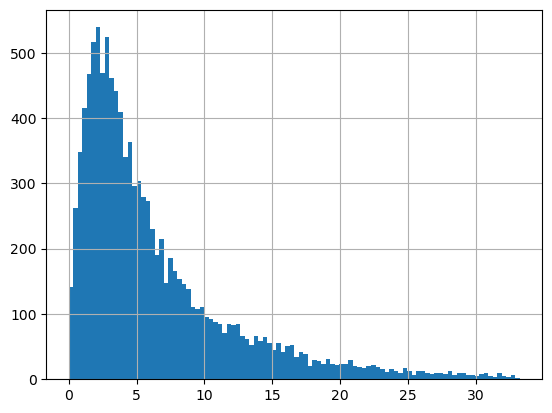

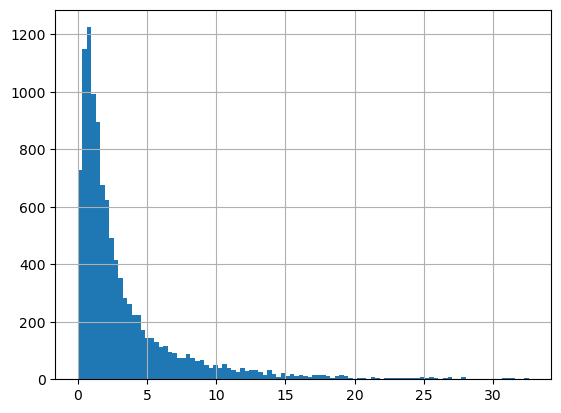

<Axes: >

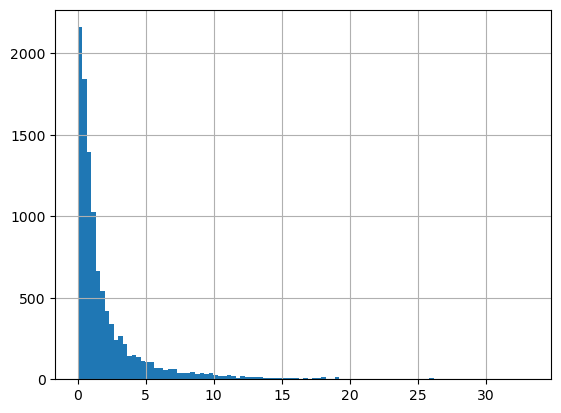

In [296]:
# Loook for the uvj errors
# zfourge_full['eU']
# zfourge_full['eV']
# zfourge_full['eJ']
# This is good cause it's not yet in magnitude, it's a flux value
((zfourge_full['eU']/zfourge_full['U'])*100).hist(bins=100)
plt.show()

((zfourge_full['eV']/zfourge_full['V'])*100).hist(bins=100)
plt.show()

((zfourge_full['eJ']/zfourge_full['J'])*100).hist(bins=100)


In [297]:
# create a flux to mag function
def flux_to_mag(flux):
    return -2.5*np.log10(flux) + 25

# create a flux to mag error function
def flux_to_mag_error(flux, error): # <- single mag error
    return np.abs((-2.5/np.log(10))*(error/flux))

def ab_mag_to_flux(mag):
    return 10**(-0.4 * (mag + 25))


In [298]:
# flux to magnitude
# Calculate the magnitude
zfourge_full['Umag'] = flux_to_mag(zfourge_full['U'])
zfourge_full['Vmag'] = flux_to_mag(zfourge_full['V'])
zfourge_full['Jmag'] = flux_to_mag(zfourge_full['J'])

# Calculate the error in the magnitude
# zfourge_full['eUmag'] = flux_to_mag_error(zfourge_full['U'], zfourge_full['eU'])
# zfourge_full['eVmag'] = flux_to_mag_error(zfourge_full['V'],zfourge_full['eV'])
# zfourge_full['eJmag'] = flux_to_mag_error(zfourge_full['J'], zfourge_full['eJ'])

# Instead just convert the error directly into magnitude
zfourge_full['eUmag'] = flux_to_mag_error(zfourge_full['U'],zfourge_full['eU'])
zfourge_full['eVmag'] = flux_to_mag_error(zfourge_full['V'],zfourge_full['eV'])
zfourge_full['eJmag'] = flux_to_mag_error(zfourge_full['J'], zfourge_full['eJ'])


# For error calculation we can convert the magnitudes to microjanskys and then perform the calculations. -> or we can just 
# Convert the errors from magnitudes to fluxes and then calculate the error in the fluxes. This is the same as the above
# # mag

# # convert ab mag to rest frame flux
# zfourge_full['fU_Full'] = ab_mag_to_flux(zfourge_full['U_Full'])
# zfourge_full['fV_Full'] = ab_mag_to_flux(zfourge_full['V_Full'])
# zfourge_full['fJ_Full'] = ab_mag_to_flux(zfourge_full['J_Full'])

# # convert ab mag to rest frame flux
# zfourge_full['fU_Decomposed'] = ab_mag_to_flux(zfourge_full['U_Decomposed'])
# zfourge_full['fV_Decomposed'] = ab_mag_to_flux(zfourge_full['V_Decomposed'])
# zfourge_full['fJ_Decomposed'] = ab_mag_to_flux(zfourge_full['J_Decomposed'])



In [299]:
# scale to be compareable to U
zfourge_full['fU_Full'] = zfourge_full['fU_Full'] 
zfourge_full['fV_Full'] = zfourge_full['fV_Full'] 
zfourge_full['fJ_Full'] = zfourge_full['fJ_Full'] 


# check
zfourge_full['fU_Full']

0        3.977497e+32
1        3.357683e+30
2        5.739852e+31
3        8.806426e+30
4        1.579437e+31
             ...     
10871    7.172906e+31
10872    8.274016e+30
10873    1.020524e+31
10874    2.782313e+30
10875    4.591055e+30
Name: fU_Full, Length: 10876, dtype: float64

In [300]:
zfourge_full['U']



0        3.960200
1        0.168694
2        1.813930
3        0.251777
4        0.726388
           ...   
10871    1.112510
10872    0.221065
10873    0.354544
10874    0.429554
10875    0.150081
Name: U, Length: 10876, dtype: float64

In [301]:


# all we will need to do is rerun the CIGALE code and than use the code below to generate the errors.
# Instead just convert the error directly into magnitude
zfourge_full['eUmag_Full'] = flux_to_mag_error(zfourge_full['fU_Full'],zfourge_full['eU'])
zfourge_full['eVmag_Full'] = flux_to_mag_error(zfourge_full['fV_Full'],zfourge_full['eV'])
zfourge_full['eJmag_Full'] = flux_to_mag_error(zfourge_full['fJ_Full'], zfourge_full['eJ'])

zfourge_full['eUmag_Decomposed'] = flux_to_mag_error(zfourge_full['fU_Decomposed'],zfourge_full['eU'])
zfourge_full['eVmag_Decomposed'] = flux_to_mag_error(zfourge_full['fV_Decomposed'],zfourge_full['eV'])
zfourge_full['eJmag_Decomposed'] = flux_to_mag_error(zfourge_full['fJ_Decomposed'], zfourge_full['eJ'])

# Create the colours
zfourge_full['UV_Full'] = zfourge_full['U_Full'] - zfourge_full['V_Full']
zfourge_full['VJ_Full'] = zfourge_full['V_Full'] - zfourge_full['J_Full']

zfourge_full['UV_Decomposed'] = zfourge_full['U_Decomposed'] - zfourge_full['V_Decomposed']
zfourge_full['VJ_Decomposed'] = zfourge_full['V_Decomposed'] - zfourge_full['J_Decomposed']


# Create the errors in the colours
zfourge_full['eUV_Full'] = np.sqrt(zfourge_full['eUmag_Full']**2 + zfourge_full['eVmag_Full']**2)
zfourge_full['eVJ_Full'] = np.sqrt(zfourge_full['eVmag_Full']**2 + zfourge_full['eJmag_Full']**2)

zfourge_full['eUV_Decomposed'] = np.sqrt(zfourge_full['eUmag_Decomposed']**2 + zfourge_full['eVmag_Decomposed']**2)
zfourge_full['eVJ_Decomposed'] = np.sqrt(zfourge_full['eVmag_Decomposed']**2 + zfourge_full['eJmag_Decomposed']**2)


# This is good but instead I'll need to provide the flux values from astSED, currently I only was outputting the actual colours

In [306]:
# # Calculate the UV colours
zfourge_full['UV_cols'] = zfourge_full['Umag'] - zfourge_full['Vmag']

# # Calculate the VJ colours
zfourge_full['VJ_cols'] = zfourge_full['Vmag'] - zfourge_full['Jmag']


# Calculate the error in the colours
zfourge_full['eUV_Full'] =  ((zfourge_full['eU']/zfourge_full['U']) + (zfourge_full['eV']/zfourge_full['V']))*zfourge_full['UV_Full'] #np.sqrt(zfourge_full['eUmag']**2 + zfourge_full['eVmag']**2)
zfourge_full['eVJ_Full'] =  ((zfourge_full['eV']/zfourge_full['V']) + (zfourge_full['eJ']/zfourge_full['J']))*zfourge_full['VJ_Full']#np.sqrt(zfourge_full['eVmag']**2 + zfourge_full['eJmag']**2)

zfourge_full['eUV_Decomposed'] =  (zfourge_full['eU']/zfourge_full['U'] + zfourge_full['eV']/zfourge_full['V'])*zfourge_full['UV_Decomposed'] #np.sqrt(zfourge_full['eUmag']**2 + zfourge_full['eVmag']**2)
zfourge_full['eVJ_Decomposed'] =  (zfourge_full['eV']/zfourge_full['V'] + zfourge_full['eJ']/zfourge_full['J'])*zfourge_full['VJ_Decomposed']#np.sqrt(zfourge_full['eVmag']**2 + zfourge_full['eJmag']**2)


# Output the dataframe 
zfourge_full.to_csv('datasets/full_zfourge_decomposed/zfourge_full_final.csv', index=False)

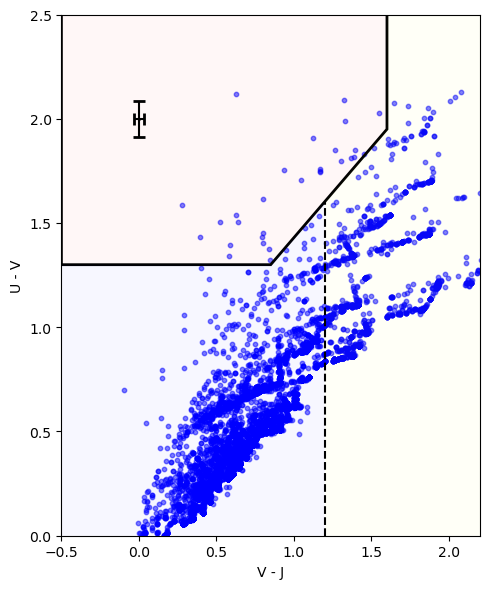

In [305]:
plot_type= ['Full','Decomposed']
i =1
# Plot a test UVJ diagram
# Maybe just plot an all redshift UVJ diagram 
fig, axs = plt.subplots(1, 1, figsize=(5, 6), sharex=True, sharey=True)


vj = zfourge_full[f'UV_{plot_type[i]}']
uv = zfourge_full[f'VJ_{plot_type[i]}']

# Plot the UVJ diagram
axs.scatter(vj, uv, c='blue', s=10, alpha=0.5, marker='o')

# choose a point to plot an average error bar
# get the average error
avg_error_UV = np.mean(zfourge_full[f'eUV_{plot_type[i]}'])
avg_error_VJ = np.mean(zfourge_full[f'eVJ_{plot_type[i]}'])

# Plot the error bar
axs.errorbar(0, 2, xerr=avg_error_VJ, yerr=avg_error_UV, fmt='o', color='black', markersize=1, capsize=4, capthick=2)

# axs.errorbar(1.2, 1.6, xerr=0.1, yerr=0.1, fmt='o', color='black', markersize=10, capsize=5, capthick=2)

# Define paths for selections
path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# We will obtain the Star-forming, Quiescent, and Dusty Fractions for this particular alpha value     
# Obtain the number of galaxies with sf region dictated by the sf path
# Create Path objects from your path coordinates (do this once, outside the loop)
path_quiescent_obj = mpath.Path(path_quiescent)
path_sf_obj = mpath.Path(path_sf)
path_sfd_obj = mpath.Path(path_sfd)

# Add patches for selections
axs.add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
axs.add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
axs.add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# Add vertical line
axs.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)

# Add axis labels
axs.set_xlabel("V - J")
axs.set_ylabel("U - V")


# Ensure limits
axs.set_xlim(-0.5, 2.2)
axs.set_ylim(0, 2.5)
    # Make the subplots closer together
# plt.subplots_adjust(wspace=0.05, hspace=0.3)


plt.tight_layout()





plt.show()